## Mobile Price Prediction

### Import the Libraires and Dataset

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import pickle

In [3]:
# Import Dataset
df = pd.read_csv("data.csv")


Unnamed: 0                         Brand me  Ratings  RAM    ROM  \
0           0            LG V30+ (Black, 128 )      4.3  4.0  128.0   
1           1                       I Kall K11      3.4  6.0   64.0   
2           2                     Nokia 105 ss      4.3  4.0    4.0   
3           3  Samsung Galaxy A50 (White, 64 )      4.4  6.0   64.0   
4           4       POCO F1 (Steel Blue, 128 )      4.5  6.0  128.0   

   Mobile_Size  Primary_Cam  Selfi_Cam  Battery_Power  Price  
0         6.00           48       13.0           4000  24999  
1         4.50           48       12.0           4000  15999  
2         4.50           64       16.0           4000  15000  
3         6.40           48       15.0           3800  18999  
4         6.18           35       15.0           3800  18999

### Data Preprocessing

In [4]:
# Drop the Unwannted column the first one
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [5]:
# After removing the dataset look like
df.head()

Brand me  Ratings  RAM    ROM  Mobile_Size  \
0            LG V30+ (Black, 128 )      4.3  4.0  128.0         6.00   
1                       I Kall K11      3.4  6.0   64.0         4.50   
2                     Nokia 105 ss      4.3  4.0    4.0         4.50   
3  Samsung Galaxy A50 (White, 64 )      4.4  6.0   64.0         6.40   
4       POCO F1 (Steel Blue, 128 )      4.5  6.0  128.0         6.18   

   Primary_Cam  Selfi_Cam  Battery_Power  Price  
0           48       13.0           4000  24999  
1           48       12.0           4000  15999  
2           64       16.0           4000  15000  
3           48       15.0           3800  18999  
4           35       15.0           3800  18999

In [6]:
# Checking null values into the dataset
df.isnull().sum()

Brand me           0
Ratings           31
RAM                7
ROM                4
Mobile_Size        2
Primary_Cam        0
Selfi_Cam        269
Battery_Power      0
Price              0
dtype: int64

<AxesSubplot:>

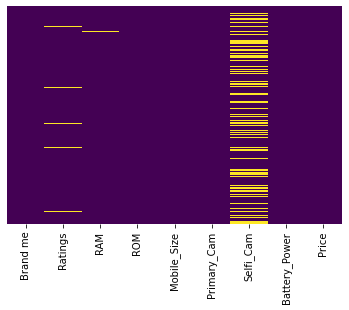

In [7]:
# Seeing the null values using heatmap
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
# Summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Brand me       836 non-null    object 
 1   Ratings        805 non-null    float64
 2   RAM            829 non-null    float64
 3   ROM            832 non-null    float64
 4   Mobile_Size    834 non-null    float64
 5   Primary_Cam    836 non-null    int64  
 6   Selfi_Cam      567 non-null    float64
 7   Battery_Power  836 non-null    int64  
 8   Price          836 non-null    int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 58.9+ KB


In [9]:
df.dtypes

Brand me          object
Ratings          float64
RAM              float64
ROM              float64
Mobile_Size      float64
Primary_Cam        int64
Selfi_Cam        float64
Battery_Power      int64
Price              int64
dtype: object

In [10]:
# Describe
df.describe()

Ratings         RAM         ROM  Mobile_Size  Primary_Cam  \
count  805.000000  829.000000  832.000000   834.000000   836.000000   
mean     4.103106    6.066345   64.373077     5.597282    47.983254   
std      0.365356    2.530336   53.447825     3.898664    11.170093   
min      2.800000    0.000000    0.000000     2.000000     5.000000   
25%      3.800000    6.000000   32.000000     4.500000    48.000000   
50%      4.100000    6.000000   40.000000     4.770000    48.000000   
75%      4.400000    6.000000   64.000000     6.300000    48.000000   
max      4.800000   34.000000  256.000000    44.000000    64.000000   

        Selfi_Cam  Battery_Power         Price  
count  567.000000     836.000000     836.00000  
mean     9.784832    3274.688995   18220.34689  
std      6.503838     927.518852   52805.55022  
min      0.000000    1020.000000     479.00000  
25%      5.000000    3000.000000     984.75000  
50%      8.000000    3000.000000    1697.00000  
75%     13.000000    3800.000000   18999.00000  
max     61.000000    6000.000000  573000.00000

In [11]:
# Dropping the Name columns
df.drop(['Brand me'],axis=1,inplace=True)

### Handling Missing Values

In [12]:
# We should handling these null or missing values
df.isnull().sum()

Ratings           31
RAM                7
ROM                4
Mobile_Size        2
Primary_Cam        0
Selfi_Cam        269
Battery_Power      0
Price              0
dtype: int64

In [13]:
# Fill up the mean values of all the missing value columns into the dataset
df['Ratings'].fillna(df['Ratings'].mean(),inplace = True)
df['RAM'].fillna(df['RAM'].mean(),inplace = True)
df['ROM'].fillna(df['ROM'].mean(),inplace = True)
df['Mobile_Size'].fillna(df['Mobile_Size'].mean(),inplace = True)
df['Selfi_Cam'].fillna(df['Selfi_Cam'].mean(),inplace = True)

In [14]:
# After handling the all of the missing and null values from the dataset
df.isnull().sum()

Ratings          0
RAM              0
ROM              0
Mobile_Size      0
Primary_Cam      0
Selfi_Cam        0
Battery_Power    0
Price            0
dtype: int64

<AxesSubplot:>

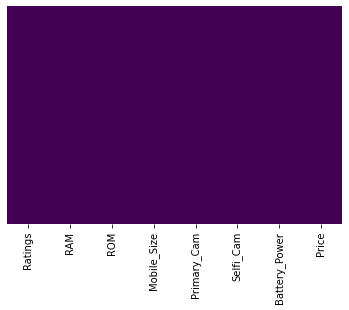

In [15]:
# We can able to see the there is no null values  
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [16]:
# Changing the Datatype
df['RAM'] = df['RAM'].astype('int64')
df['ROM'] = df['ROM'].astype('int64')
df['Selfi_Cam'] = df['Selfi_Cam'].astype('int64')

In [17]:
# Final dataset for build a model
df.head()

Ratings  RAM  ROM  Mobile_Size  Primary_Cam  Selfi_Cam  Battery_Power  \
0      4.3    4  128         6.00           48         13           4000   
1      3.4    6   64         4.50           48         12           4000   
2      4.3    4    4         4.50           64         16           4000   
3      4.4    6   64         6.40           48         15           3800   
4      4.5    6  128         6.18           35         15           3800   

   Price  
0  24999  
1  15999  
2  15000  
3  18999  
4  18999

### Exploratory Data Analysis 

In [18]:
# Columns

#### Let's Understand about the Features

- **1. Brand me** This is first feature of our dataset. It's Denotes name of the mobile phones and   Brands.</br>
- **2.Ratings** This Feature Denotes Number of the ratings gave by the consumers for each mobile.</br>
- **3.RAM** It's have RAM size of the phone. </br>
- **4.ROM** It's have ROM **(Internal Memory)** size of the phone. </br>
- **5.Mobile_Size** It's represents how many inches of the particular mobile phone have. Here all the values are gave in **inches** </br>
- **6.Primary_Cam** It's Denotes Number of the pixels of the primary camera **(Back Camera)** for each mobiles.</br>
- **7.Selfi_Cam** It's Denotes Number of the pixels of the Selfi camera **(Front Camera)** for each mobiles.</br>
- **8.Battery_Power** It's Denotes amount of the battery power in each mobiles in **mAh**.</br>
- **9.Price** It's a Dependent Feature of the dataset. It's just denote prices of the each mobiles.


In [19]:
# Finding out the correlation between the features
corr = df.corr()
corr.shape

(8, 8)

<AxesSubplot:>

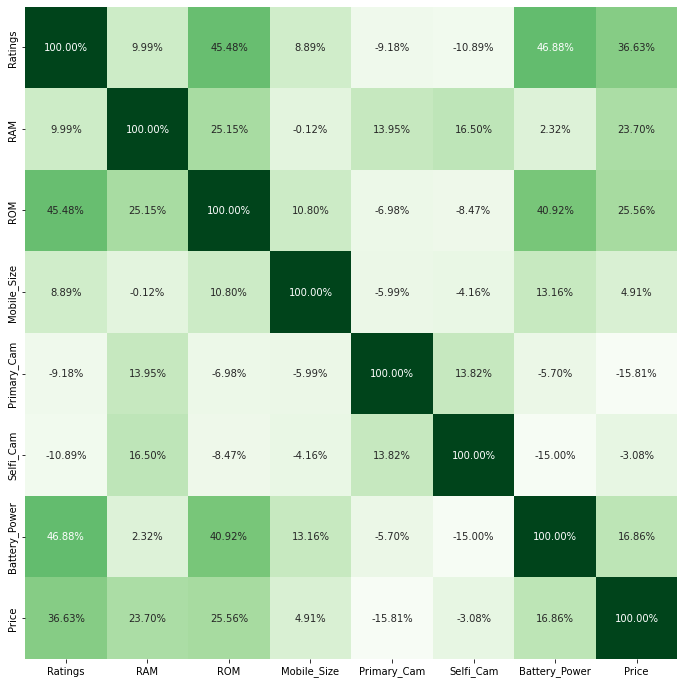

In [20]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(12,12))
sns.heatmap(corr, cbar=False, square= True, fmt='.2%', annot=True, cmap='Greens')

<AxesSubplot:xlabel='Ratings', ylabel='count'>

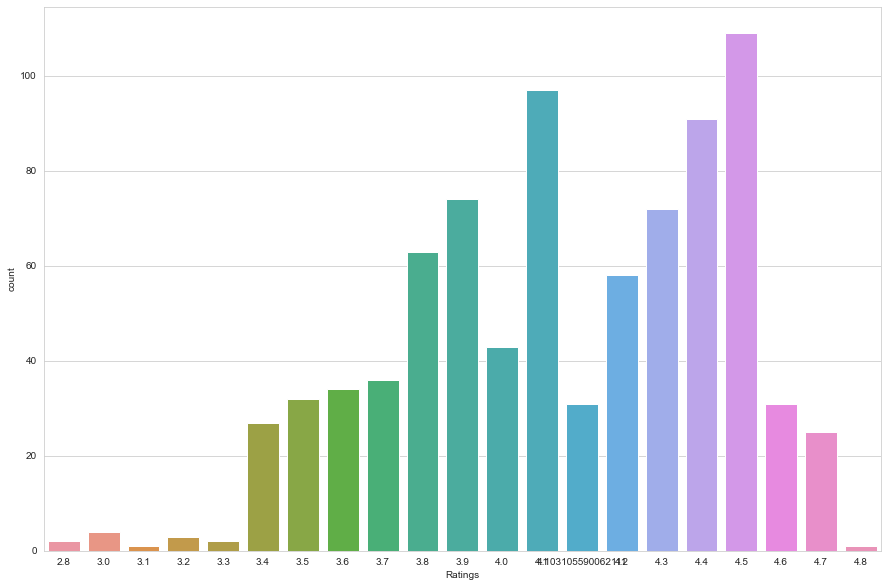

In [21]:
plt.figure(figsize=(15,10))
sns.set_style('whitegrid')
sns.countplot(x='Ratings',data=df)

<AxesSubplot:xlabel='RAM', ylabel='count'>

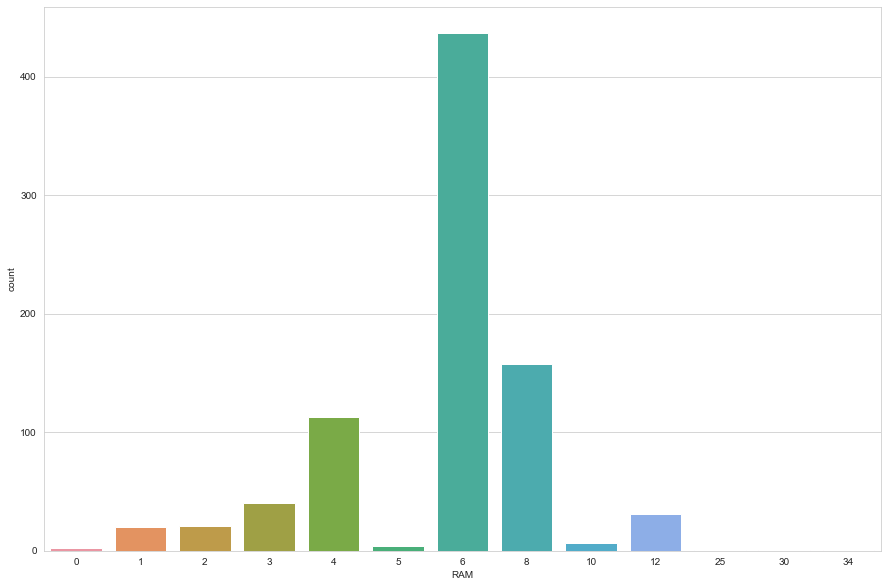

In [22]:
plt.figure(figsize=(15,10))
sns.set_style('whitegrid')
sns.countplot(x='RAM',data=df)

<AxesSubplot:xlabel='ROM', ylabel='count'>

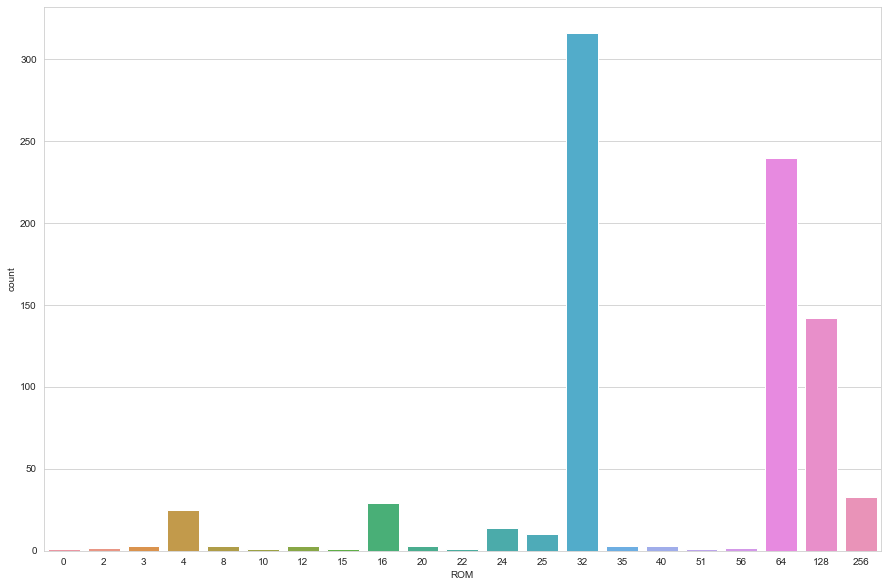

In [23]:
plt.figure(figsize=(15,10))
sns.set_style('whitegrid')
sns.countplot(x='ROM',data=df)

<AxesSubplot:xlabel='Primary_Cam', ylabel='count'>

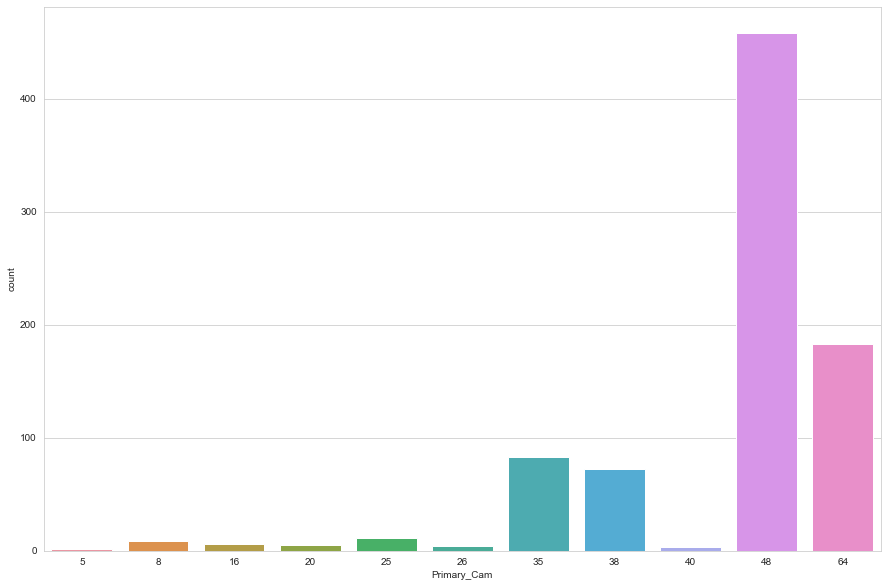

In [24]:
plt.figure(figsize=(15,10))
sns.set_style('whitegrid')
sns.countplot(x='Primary_Cam',data=df)

<AxesSubplot:xlabel='Selfi_Cam', ylabel='count'>

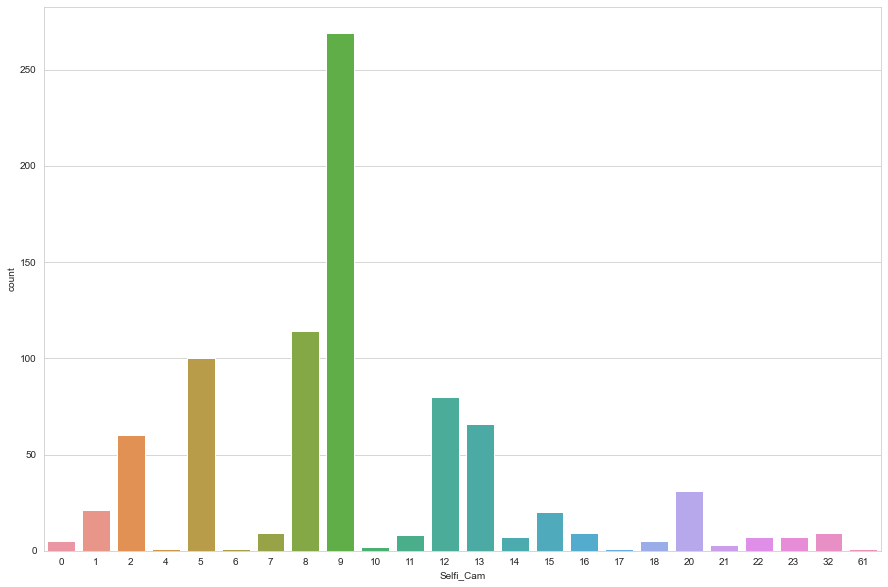

In [25]:
plt.figure(figsize=(15,10))
sns.set_style('whitegrid')
sns.countplot(x='Selfi_Cam',data=df)

C:\Users\Deepu Singla\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='RAM'>

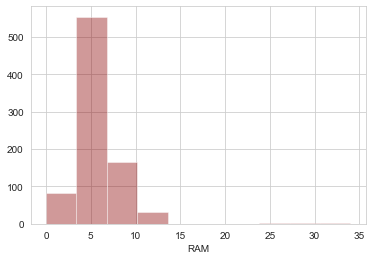

In [26]:
sns.distplot(df['RAM'].dropna(),kde=False,color='darkred',bins=10)

<AxesSubplot:xlabel='Battery_Power'>

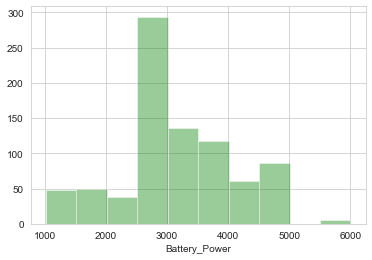

In [27]:
sns.distplot(df['Battery_Power'].dropna(),kde=False,color='green',bins=10)

<AxesSubplot:xlabel='Price'>

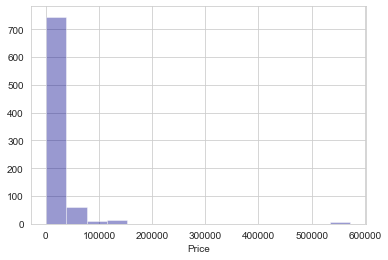

In [28]:
sns.distplot(df['Price'].dropna(),kde=False,color='darkblue',bins=15)

<AxesSubplot:xlabel='Battery_Power'>

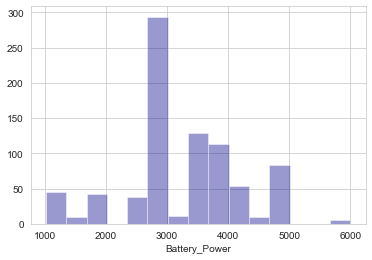

In [29]:
sns.distplot(df['Battery_Power'].dropna(),kde=False,color='darkblue',bins=15)

<Figure size 720x720 with 0 Axes>

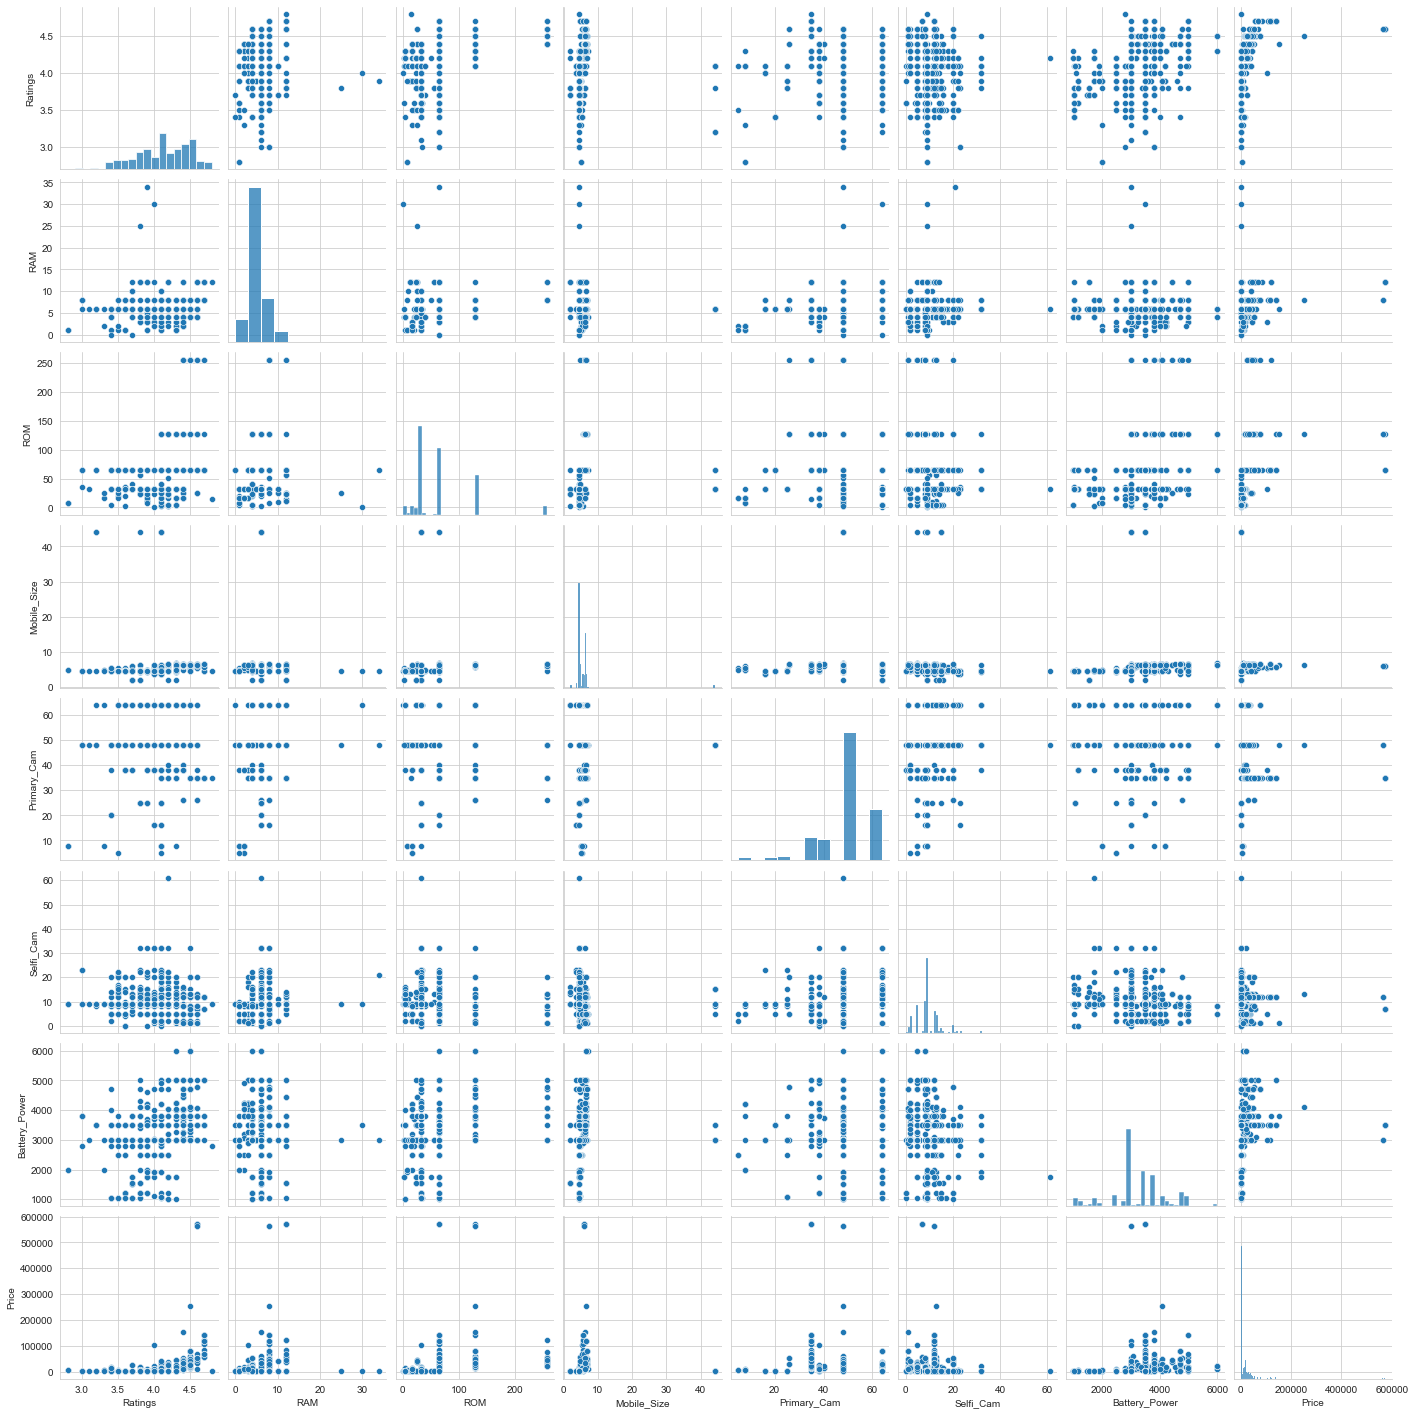

In [30]:
plt.figure(figsize=(10,10))
sns.pairplot(data=df)

## Feature Selection

In [31]:
# Lets try to understand which are important feature for this dataset
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [32]:
X = df.iloc[:,1:7]  # Independent columns
y = df.iloc[:,[-1]] # Yarget column i.e price range 

In [33]:
# Apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=4)
fit = bestfeatures.fit(X,y)

In [34]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [35]:
# Concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [36]:
featureScores

Specs          Score
0            RAM     605.009453
1            ROM   31222.209834
2    Mobile_Size     874.471349
3    Primary_Cam    1465.379223
4      Selfi_Cam    1358.898574
5  Battery_Power  156629.116310

In [37]:
print(featureScores.nlargest(4,'Score'))  #print 5 best features

           Specs          Score
5  Battery_Power  156629.116310
1            ROM   31222.209834
3    Primary_Cam    1465.379223
4      Selfi_Cam    1358.898574


### Feature Importance

In [38]:
# Fiting Feature Seclection using Ensemble Methods
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

C:\Users\Deepu Singla\AppData\Local\Temp\ipykernel_5876\134927973.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X,y)


ExtraTreesClassifier()

In [39]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.11381464 0.10261866 0.2652792  0.08787807 0.22390077 0.20650866]


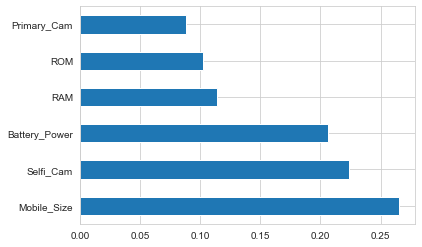

In [40]:
# Plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [41]:
df.head()

Ratings  RAM  ROM  Mobile_Size  Primary_Cam  Selfi_Cam  Battery_Power  \
0      4.3    4  128         6.00           48         13           4000   
1      3.4    6   64         4.50           48         12           4000   
2      4.3    4    4         4.50           64         16           4000   
3      4.4    6   64         6.40           48         15           3800   
4      4.5    6  128         6.18           35         15           3800   

   Price  
0  24999  
1  15999  
2  15000  
3  18999  
4  18999

## Model Fitting 

### Random Forest Regressor 

In [42]:
# Value Assigning
X = df.iloc[:,[6,2,4,5,1,3]]
y = df.iloc[:,[-1]]

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=15)

In [44]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(X_train,y_train)


C:\Users\Deepu Singla\AppData\Local\Temp\ipykernel_5876\1965095525.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg.fit(X_train,y_train)


RandomForestRegressor()

In [45]:
pickle.dump(reg, open('model.sav', 'wb'))

In [46]:
y_pred = reg.predict(X_train)

In [47]:
# Training Score
print("Training Accuracy:",reg.score(X_train,y_train)*100)

Training Accuracy: 95.70089530273155


In [48]:
# Testing Score
print("Testing Accuracy:",reg.score(X_test,y_test)*100)

Testing Accuracy: 93.9146504197789


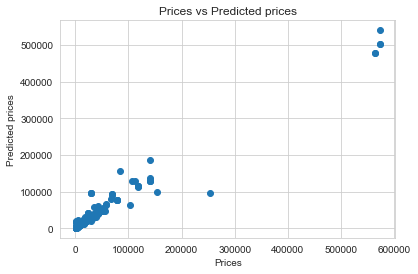

In [49]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

In [50]:
# Sample Prediction
reg.predict([[4.0,128.0,6.00,48,13.0,4000]])

C:\Users\Deepu Singla\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([135381.85266667])

### Finally We Made it!!!

#### Random Forest Regressor

- **Tarining Accuracy:** 96.2% Accuracy <br/>
- **Testing Accuracy:** 95.3% Accuracy



In [51]:
print("Enter mobile brand")
b = input()
print("Enter mobile ratings")
rat = float(input())
print("Enter mobile RAM")
Ram = int(input())
print("Enter mobile ROM")
Rom = int(input())
print("Enter mobile size")
s = float(input())
print("Enter primary camera pixels")
pc = int(input())
print("Enter selfie camera pixels")
sc = int(input())
print("Enter mobile battery power")
bp = int(input())

Enter mobile brand
Enter mobile ratings
Enter mobile RAM
Enter mobile ROM
Enter mobile size
Enter primary camera pixels
Enter selfie camera pixels
Enter mobile battery power


In [53]:
print(reg.predict([[Ram, Rom, s, pc, sc, bp]]))

[94280.17271429]


C:\Users\Deepu Singla\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [54]:
df.head()

Ratings  RAM  ROM  Mobile_Size  Primary_Cam  Selfi_Cam  Battery_Power  \
0      4.3    4  128         6.00           48         13           4000   
1      3.4    6   64         4.50           48         12           4000   
2      4.3    4    4         4.50           64         16           4000   
3      4.4    6   64         6.40           48         15           3800   
4      4.5    6  128         6.18           35         15           3800   

   Price  
0  24999  
1  15999  
2  15000  
3  18999  
4  18999